In [1]:
# Import the library
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,plot_confusion_matrix,plot_roc_curve
import matplotlib.pyplot as plt

C:\Users\nidhi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("c:\\users\\nidhi\\desktop\\Betterhealth_data.csv",encoding= 'unicode_escape')
data.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,California,Hawthorne,Census Tract,BRFSS,Health Outcomes,0632548-06037602504,Arthritis among adults aged >=18 Years,%,...,15.2,NaN,NaN,"4,407","(33.905547923, -118.337332298)",HLTHOUT,ARTHRITIS,632548.0,6.037603e+09,Arthritis
1,2017,CA,California,Hawthorne,City,BRFSS,Unhealthy Behaviors,632548,Current smoking among adults aged >=18 Years,%,...,15.9,NaN,NaN,"84,293","(33.914667701, -118.347667728)",UNHBEH,CSMOKING,632548.0,NaN,Current Smoking
2,2017,CA,California,Hayward,City,BRFSS,Health Outcomes,633000,Coronary heart disease among adults aged >=18 ...,%,...,4.8,NaN,NaN,"144,186","(37.6329591551, -122.077051051)",HLTHOUT,CHD,633000.0,NaN,Coronary Heart Disease
3,2017,CA,California,Hayward,City,BRFSS,Unhealthy Behaviors,633000,Obesity among adults aged >=18 Years,%,...,24.4,NaN,NaN,"144,186","(37.6329591551, -122.077051051)",UNHBEH,OBESITY,633000.0,NaN,Obesity
4,2017,CA,California,Hemet,City,BRFSS,Prevention,633182,Cholesterol screening among adults aged >=18 Y...,%,...,78.3,NaN,NaN,"78,657","(33.7352277311, -116.994605005)",PREVENT,CHOLSCREEN,633182.0,NaN,Cholesterol Screening


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810102 entries, 0 to 810101
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Year                        810102 non-null  int64  
 1   StateAbbr                   810102 non-null  object 
 2   StateDesc                   810102 non-null  object 
 3   CityName                    810047 non-null  object 
 4   GeographicLevel             810102 non-null  object 
 5   DataSource                  810102 non-null  object 
 6   Category                    810102 non-null  object 
 7   UniqueID                    810102 non-null  object 
 8   Measure                     810102 non-null  object 
 9   Data_Value_Unit             810102 non-null  object 
 10  DataValueTypeID             810102 non-null  object 
 11  Data_Value_Type             810102 non-null  object 
 12  Data_Value                  787310 non-null  float64
 13  Low_Confidence

In [57]:
#columns_to_drop
X=data.drop(columns=[ 'Year', 'StateDesc', 'DataSource', 'Measure','Data_Value_Unit', 'Data_Value_Footnote', 'Data_Value_Type', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Data_Value_Footnote_Symbol', 'CategoryID', 'Short_Question_Text'])
X

,StateAbbr,CityName,GeographicLevel,Category,UniqueID,DataValueTypeID,Data_Value,PopulationCount,GeoLocation,MeasureId,CityFIPS,TractFIPS
0,CA,Hawthorne,Census Tract,Health Outcomes,0632548-06037602504,CrdPrv,14.6,"4,407","(33.905547923, -118.337332298)",ARTHRITIS,632548.0,6.037603e+09
1,CA,Hawthorne,City,Unhealthy Behaviors,632548,CrdPrv,15.4,"84,293","(33.914667701, -118.347667728)",CSMOKING,632548.0,NaN
2,CA,Hayward,City,Health Outcomes,633000,AgeAdjPrv,4.8,"144,186","(37.6329591551, -122.077051051)",CHD,633000.0,NaN
3,CA,Hayward,City,Unhealthy Behaviors,633000,CrdPrv,24.2,"144,186","(37.6329591551, -122.077051051)",OBESITY,633000.0,NaN
4,CA,Hemet,City,Prevention,633182,AgeAdjPrv,78.0,"78,657","(33.7352277311, -116.994605005)",CHOLSCREEN,633182.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
810097,WI,Madison,Census Tract,Health Outcomes,5548000-55025000202,CrdPrv,3.8,"3,016","(43.0683437287, -89.4935639435)",COPD,5548000.0,5.502500e+10
810098,WA,Tacoma,Census Tract,Prevention,5370000-53053061900,CrdPrv,74.2,"1,961","(47.2276735186, -122.434170835)",CHOLSCREEN,5370000.0,5.305306e+10
810099,WA,Vancouver,Census Tract,Health Outcomes,5374060-53011041331,CrdPrv,28.1,"2,565","(45.6495869118, -122.552061838)",HIGHCHOL,5374060.0,5.301104e+10
810100,WI,Appleton,Census Tract,Unhealthy Behaviors,5502375-55087010200,CrdPrv,27.0,"4,048","(44.2675274909, -88.4261164976)",BINGE,5502375.0,5.508701e+10


In [39]:
data_withoutnulls=X.dropna()
data_withoutnulls.info()
data_withoutnulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787255 entries, 0 to 810101
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   StateAbbr        787255 non-null  object 
 1   CityName         787255 non-null  object 
 2   Category         787255 non-null  object 
 3   Data_Value       787255 non-null  float64
 4   PopulationCount  787255 non-null  object 
dtypes: float64(1), object(4)
memory usage: 36.0+ MB


,StateAbbr,CityName,Category,Data_Value,PopulationCount
0,CA,Hawthorne,Health Outcomes,14.6,"4,407"
1,CA,Hawthorne,Unhealthy Behaviors,15.4,"84,293"
2,CA,Hayward,Health Outcomes,4.8,"144,186"
3,CA,Hayward,Unhealthy Behaviors,24.2,"144,186"
4,CA,Hemet,Prevention,78.0,"78,657"
...,...,...,...,...,...
810097,WI,Madison,Health Outcomes,3.8,"3,016"
810098,WA,Tacoma,Prevention,74.2,"1,961"
810099,WA,Vancouver,Health Outcomes,28.1,"2,565"
810100,WI,Appleton,Unhealthy Behaviors,27.0,"4,048"


In [58]:
data_withoutnulls=X.dropna()
data_withoutnulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759349 entries, 0 to 810101
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   StateAbbr        759349 non-null  object 
 1   CityName         759349 non-null  object 
 2   GeographicLevel  759349 non-null  object 
 3   Category         759349 non-null  object 
 4   UniqueID         759349 non-null  object 
 5   DataValueTypeID  759349 non-null  object 
 6   Data_Value       759349 non-null  float64
 7   PopulationCount  759349 non-null  object 
 8   GeoLocation      759349 non-null  object 
 9   MeasureId        759349 non-null  object 
 10  CityFIPS         759349 non-null  float64
 11  TractFIPS        759349 non-null  float64
dtypes: float64(3), object(9)
memory usage: 75.3+ MB


In [59]:
cleandata=data_withoutnulls[data_withoutnulls.DataValueTypeID!='AgeAdjPrv']
  
cleandata.info()
cleandata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759349 entries, 0 to 810101
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   StateAbbr        759349 non-null  object 
 1   CityName         759349 non-null  object 
 2   GeographicLevel  759349 non-null  object 
 3   Category         759349 non-null  object 
 4   UniqueID         759349 non-null  object 
 5   DataValueTypeID  759349 non-null  object 
 6   Data_Value       759349 non-null  float64
 7   PopulationCount  759349 non-null  object 
 8   GeoLocation      759349 non-null  object 
 9   MeasureId        759349 non-null  object 
 10  CityFIPS         759349 non-null  float64
 11  TractFIPS        759349 non-null  float64
dtypes: float64(3), object(9)
memory usage: 75.3+ MB


,StateAbbr,CityName,GeographicLevel,Category,UniqueID,DataValueTypeID,Data_Value,PopulationCount,GeoLocation,MeasureId,CityFIPS,TractFIPS
0,CA,Hawthorne,Census Tract,Health Outcomes,0632548-06037602504,CrdPrv,14.6,"4,407","(33.905547923, -118.337332298)",ARTHRITIS,632548.0,6.037603e+09
5,CA,Indio,Census Tract,Health Outcomes,0636448-06065045213,CrdPrv,22.0,"5,006","(33.7144617083, -116.258246324)",ARTHRITIS,636448.0,6.065045e+09
8,CA,Inglewood,Census Tract,Health Outcomes,0636546-06037601801,CrdPrv,12.7,"2,472","(33.9439711273, -118.349937728)",DIABETES,636546.0,6.037602e+09
14,AL,Hoover,Census Tract,Prevention,0135896-01073014302,CrdPrv,81.9,"1,636","(33.3923792867, -86.8833755105)",MAMMOUSE,135896.0,1.073014e+09
17,AL,Huntsville,Census Tract,Health Outcomes,0137000-01089002922,CrdPrv,9.3,"4,387","(34.612755588, -86.5329568642)",DIABETES,137000.0,1.089003e+09


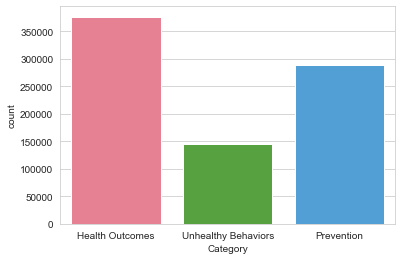

In [70]:
sns.set_style("whitegrid")
sns.countplot(data=data,x='Category',palette='husl')
print('')

In [71]:
cleandata.groupby('Category')["Data_Value"].mean()

Category
Health Outcomes        13.136814
Prevention             58.043545
Unhealthy Behaviors    26.164686
Name: Data_Value, dtype: float64

In [72]:
cleandata.groupby('Category')["PopulationCount"].mean()

Category
Health Outcomes        3785.944050
Prevention             3786.613532
Unhealthy Behaviors    3785.703087
Name: PopulationCount, dtype: float64

In [63]:
cleandata.PopulationCount = cleandata.PopulationCount.str.replace (',', '').astype (float).astype(int)
cleandata_df=cleandata.groupby(['StateAbbr','CityName','Category'])[['Data_Value','PopulationCount']].mean().reset_index()
cleandata_df

,StateAbbr,CityName,Category,Data_Value,PopulationCount
0,AK,Anchorage,Health Outcomes,11.508811,5305.927273
1,AK,Anchorage,Prevention,54.669273,5305.927273
2,AK,Anchorage,Unhealthy Behaviors,24.916000,5305.927273
3,AL,Birmingham,Health Outcomes,17.001368,2356.044444
4,AL,Birmingham,Prevention,60.233370,2358.582870
...,...,...,...,...,...
1495,WV,Charleston,Prevention,63.519545,2334.136364
1496,WV,Charleston,Unhealthy Behaviors,28.747273,2334.136364
1497,WY,Cheyenne,Health Outcomes,12.549038,3716.625000
1498,WY,Cheyenne,Prevention,57.193125,3716.625000


In [64]:
fig=px.box(cleandata_df,x='Category',y='Data_Value')
fig.show()

In [65]:
fig=px.box(cleandata_df,x='Category',y='PopulationCount')
fig.show()

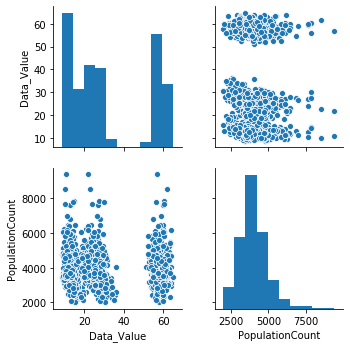

In [66]:
sns.pairplot(cleandata_df)

In [68]:
category_encoded = pd.get_dummies(cleandata_df, columns=['Category'])
category_encoded

,StateAbbr,CityName,Data_Value,PopulationCount,Category_Health Outcomes,Category_Prevention,Category_Unhealthy Behaviors
0,AK,Anchorage,11.508811,5305.927273,1,0,0
1,AK,Anchorage,54.669273,5305.927273,0,1,0
2,AK,Anchorage,24.916000,5305.927273,0,0,1
3,AL,Birmingham,17.001368,2356.044444,1,0,0
4,AL,Birmingham,60.233370,2358.582870,0,1,0
...,...,...,...,...,...,...,...
1495,WV,Charleston,63.519545,2334.136364,0,1,0
1496,WV,Charleston,28.747273,2334.136364,0,0,1
1497,WY,Cheyenne,12.549038,3716.625000,1,0,0
1498,WY,Cheyenne,57.193125,3716.625000,0,1,0


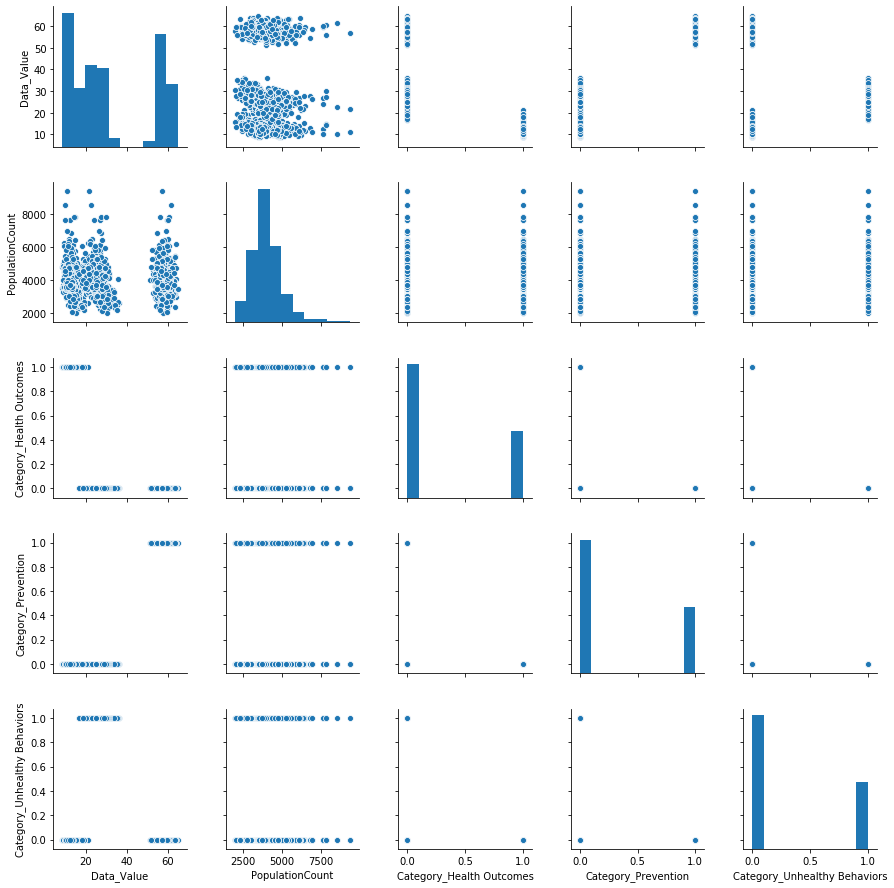

In [69]:
sns.pairplot(category_encoded)